In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [2]:
data_IO = np.load('/work/NuFit_IO.npz')
data_NO = np.load('/work/NuFit_NO.npz')
features = data_IO.files

In [3]:
features = ['ve_dune', 'vu_dune', 'vebar_dune', 'vubar_dune', 've_t2hk', 'vu_t2hk', 'vebar_t2hk', 
            'vubar_t2hk', 'theta12', 'theta13', 'theta23', 'delta', 'sdm', 'ldm', 'octant', 'cpv', 'mo']
classes = ['theta12', 'theta13', 'theta23', 'delta', 'sdm', 'ldm']
types = ['octant', 'cpv', 'mo']

In [4]:
data_IO_all = np.column_stack([data_IO['ve_dune'], data_IO['vu_dune'], data_IO['vebar_dune'], data_IO['vubar_dune'], data_IO['ve_t2hk'], data_IO['vu_t2hk'], data_IO['vebar_t2hk'], data_IO['vubar_t2hk']])[0]
data_NO_all = np.column_stack([data_NO['ve_dune'], data_NO['vu_dune'], data_NO['vebar_dune'], data_NO['vubar_dune'], data_NO['ve_t2hk'], data_NO['vu_t2hk'], data_NO['vebar_t2hk'], data_NO['vubar_t2hk']])[0]

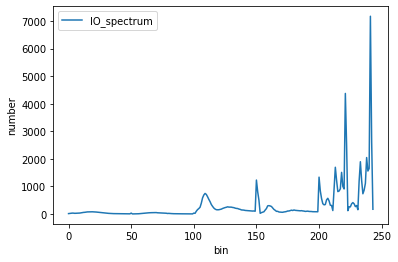

In [18]:
plt.plot(data_IO_all, label = 'IO_spectrum')
# plt.plot(data_NO_all, label = 'NO_spectrum')
plt.xlabel('bin')
plt.ylabel('number')
plt.legend()
plt.savefig('IO spectrum')
plt.show()

In [12]:
generate = 10
num_of_bins = len(data_IO_all)
data_IO_create_poisson = np.random.poisson(data_IO_all, size = (generate, num_of_bins))
data_NO_create_poisson = np.random.poisson(data_NO_all, size = (generate, num_of_bins))

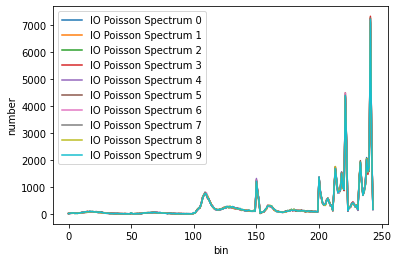

In [17]:
for i in range(generate):
    plt.plot(data_IO_create_poisson[i,:], label = 'IO Poisson Spectrum {}'.format(i))
plt.xlabel('bin')
plt.ylabel('number')
plt.legend()
plt.savefig('IO spectrums')
plt.show()

In [10]:
cut = 500
np.save('/work/NIO_largerthan{}_index'.format(cut), np.where(np.logical_and(data_IO_all > cut, data_NO_all > cut))[0])

In [11]:
len(np.where(np.logical_and(data_IO_all > cut, data_NO_all > cut))[0])

35

In [23]:
times = 2
data_IO_max = [b + math.sqrt(b)*times for b in data_IO_all]
data_IO_min = [b - math.sqrt(b)*times for b in data_IO_all]
data_NO_max = [b + math.sqrt(b)*times for b in data_NO_all]
data_NO_min = [b - math.sqrt(b)*times for b in data_NO_all]

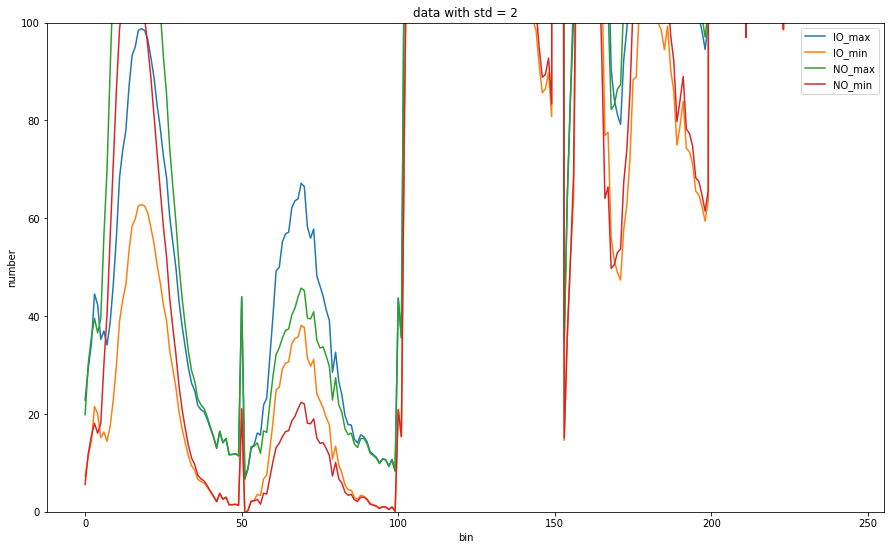

In [24]:
plt.figure(figsize=(15, 9))
plt.plot(data_IO_max, label = 'IO_max')
plt.plot(data_IO_min, label = 'IO_min')
plt.plot(data_NO_max, label = 'NO_max')
plt.plot(data_NO_min, label = 'NO_min')
plt.xlabel('bin')
plt.ylabel('number')
plt.ylim(0, 100)
plt.legend()
plt.title('data with std = {}'.format(times))
plt.show()

In [7]:
for c in classes:
    print(c, 'IO: ', data_IO[c][0], ', NO: ', data_NO[c][0])

theta12 IO:  33.45 , NO:  33.44
theta13 IO:  8.61 , NO:  8.57
theta23 IO:  49.3 , NO:  49.0
delta IO:  286.0 , NO:  195.0
sdm IO:  7.42 , NO:  7.42
ldm IO:  -2.497 , NO:  2.514


In [8]:
target_IO = tf.keras.utils.to_categorical((data_IO['octant'] + 1) + data_IO['cpv']*3 + (data_IO['mo']+1)*3)
target_IO.argmax(axis = 1)

array([5])

In [9]:
target_NO = tf.keras.utils.to_categorical((data_NO['octant'] + 1) + data_NO['cpv']*3 + (data_NO['mo']+1)*3)
target_NO.argmax(axis = 1)

array([11])